# Fundamentals

## 1) Planning

Practice the following concepts covered in the Module:

- Work with a brazillian variable income database (Stocks);

- Work with indicators of fundamental analysis of stocks (Price, Liquidity, P/E, DY);

- Perform exploratory analysis of variable income data;

- Exercise with some basic Python commands for data analysis and graphing.

## 2) Collecting the data

In [124]:
#@title 2.1) Read the downloaded CSV file
import pandas as pd

stocks = pd.read_csv("../data/raw/stocks.csv", sep=";")

## 3) Exploratory analysis

In [125]:
#@title 3.1) First values
stocks.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,"22,51",NaN,"-19,65","2,32","1,03","30,55","-0,34","-12,41","-711,02",...,"0,45","0,54","0,42","3,62",NaN,"10.384.806,14","9,68","-1,15","0,04","2.668.685.928,96"
1,ABCB4,"16,96","8,24","4,79","0,74","0,07","35,76","27,56","19,63","3,41",...,"0,09","0,91","0,07","13,58","13,36","16.670.459,65","23,02","3,54","0,12","3.820.922.994,20"
2,ABEV3,"14,37","5,30","15,65","2,72","1,64","49,29","22,15","18,14","12,82",...,"0,60","0,40","0,58","10,72","14,74","476.041.978,00","5,29","0,92","1,11","226.173.113.980,36"
3,ADHM3,"1,56",NaN,"-4,09","-1,29","105,12","100,00","-13.548,48","-18.860,61","-5,69",...,"-81,72","82,72","0,14",NaN,NaN,NaN,"-1,21","-0,38","-0,58","25.439.770,20"
4,AERI3,"1,18",NaN,"-9,75","1,02","0,24","11,93","8,65","-3,76","4,24",...,"0,23","0,77","0,65",NaN,NaN,"8.424.928,84","1,15","-0,12","0,04","904.131.878,08"


In [126]:
#@title 3.2) Last values
stocks.tail()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
596,WIZC3,"5,87","10,02","6,97","1,04","0,41","57,96","37,65","14,19","2,63",...,"0,39","0,61","0,41","12,37","-3,31","4.979.105,93","5,66","0,84","-0,25","940.254.818,16"
597,WLMM3,"22,00","6,18","6,83","1,29","0,99","13,34","7,75","5,94","5,24",...,"0,77","0,23","2,43","32,16",NaN,"4.400,00","17,09","3,22","0,62","836.840.950,00"
598,WLMM4,"23,50","3,88","7,30","1,37","1,05","13,34","7,75","5,94","5,59",...,"0,77","0,23","2,43","32,16",NaN,"17.568,85","17,09","3,22","0,67","836.840.950,00"
599,YDUQ3,"7,04","1,80","-37,36","0,74","0,24","56,57","13,53","-1,28","3,52",...,"0,33","0,67","0,50","6,20",NaN,"43.231.411,19","9,58","-0,19","0,27","2.182.167.288,06"
600,ZAMP3,"4,66",NaN,"-23,00","0,86","0,31","64,39","2,65","-1,53","13,26",...,"0,36","0,64","0,88","15,36",NaN,"5.985.243,79","5,39","-0,20","0,29","1.266.635.056,20"


In [127]:
#@title 3.3) Rows and columns count
stocks.shape

(601, 30)

In [128]:
#@title 3.4) Rows and columns count
stocks.columns

Index(['TICKER', 'PRECO', 'DY', 'P/L', 'P/VP', 'P/ATIVOS', 'MARGEM BRUTA',
       'MARGEM EBIT', 'MARG. LIQUIDA', 'P/EBIT', 'EV/EBIT',
       'DIVIDA LIQUIDA / EBIT', 'DIV. LIQ. / PATRI.', 'PSR', 'P/CAP. GIRO',
       'P. AT CIR. LIQ.', 'LIQ. CORRENTE', 'ROE', 'ROA', 'ROIC',
       'PATRIMONIO / ATIVOS', 'PASSIVOS / ATIVOS', 'GIRO ATIVOS',
       'CAGR RECEITAS 5 ANOS', 'CAGR LUCROS 5 ANOS', ' LIQUIDEZ MEDIA DIARIA',
       ' VPA', ' LPA', ' PEG Ratio', ' VALOR DE MERCADO'],
      dtype='object')

In [129]:
#@title 3.5.1) Columns types
stocks.dtypes

TICKER                    object
PRECO                     object
DY                        object
P/L                       object
P/VP                      object
P/ATIVOS                  object
MARGEM BRUTA              object
MARGEM EBIT               object
MARG. LIQUIDA             object
P/EBIT                    object
EV/EBIT                   object
DIVIDA LIQUIDA / EBIT     object
DIV. LIQ. / PATRI.        object
PSR                       object
P/CAP. GIRO               object
P. AT CIR. LIQ.           object
LIQ. CORRENTE             object
ROE                       object
ROA                       object
ROIC                      object
PATRIMONIO / ATIVOS       object
PASSIVOS / ATIVOS         object
GIRO ATIVOS               object
CAGR RECEITAS 5 ANOS      object
CAGR LUCROS 5 ANOS        object
 LIQUIDEZ MEDIA DIARIA    object
 VPA                      object
 LPA                      object
 PEG Ratio                object
 VALOR DE MERCADO         object
dtype: obj

In [130]:
#@title 3.5.2) Convert columns to appropriate types
stocks.replace("\.", "", regex=True, inplace=True)
stocks.replace(",", ".", regex=True, inplace=True)

stocks = stocks.apply(pd.to_numeric, errors="ignore")
stocks = stocks.convert_dtypes()

stocks.dtypes

c:\Users\pedro\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\pandas\core\dtypes\cast.py:1134: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
c:\Users\pedro\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\pandas\core\dtypes\cast.py:1153: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


TICKER                     string
PRECO                     Float64
DY                        Float64
P/L                       Float64
P/VP                      Float64
P/ATIVOS                  Float64
MARGEM BRUTA              Float64
MARGEM EBIT               Float64
MARG. LIQUIDA             Float64
P/EBIT                    Float64
EV/EBIT                   Float64
DIVIDA LIQUIDA / EBIT     Float64
DIV. LIQ. / PATRI.        Float64
PSR                       Float64
P/CAP. GIRO               Float64
P. AT CIR. LIQ.           Float64
LIQ. CORRENTE             Float64
ROE                       Float64
ROA                       Float64
ROIC                      Float64
PATRIMONIO / ATIVOS       Float64
PASSIVOS / ATIVOS         Float64
GIRO ATIVOS               Float64
CAGR RECEITAS 5 ANOS      Float64
CAGR LUCROS 5 ANOS        Float64
 LIQUIDEZ MEDIA DIARIA    Float64
 VPA                      Float64
 LPA                      Float64
 PEG Ratio                Float64
 VALOR DE MERC

In [131]:
#@title 3.6) Statistical summary for numerical columns
stocks.describe()

,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
count,601.0,352.0,600.0,600.0,600.0,573.0,573.0,573.0,599.0,592.0,...,600.0,600.0,600.0,506.0,297.0,481.0,601.0,601.0,593.0,594.0
mean,54.675141,7.272386,16.8154,10.022317,55.6935,-10.64082,8.761728,37.285323,17.280902,14.239341,...,-0.71945,1.714933,0.564467,12.295316,21.909024,44154282.669854,998.893261,76.947404,-0.597487,10738882919.118519
std,502.417606,7.973027,299.658956,131.00526,1307.304373,409.341019,1065.963968,1117.953903,259.391549,253.773444,...,14.760687,14.761156,0.551019,29.841578,33.717594,145316843.033843,16669.448648,1266.383407,9.336002,34000476580.408916
min,0.0,0.01,-3584.81,-304.82,0.0,-3678.63,-18852.94,-18860.61,-772.91,-864.43,...,-344.22,0.0,-0.87,-75.29,-61.39,765.0,-3661.67,-257.18,-183.8,0.0
25%,3.85,2.6725,0.0,0.325,0.13,19.82,4.35,0.57,0.395,1.6,...,0.13,0.49,0.15,3.7525,4.42,25527.5,2.91,-0.01,-0.24,192101294.7075
50%,10.05,5.355,5.47,0.895,0.35,31.43,13.3,6.74,3.82,5.905,...,0.34,0.65,0.44,11.475,15.62,1078155.63,8.31,0.81,0.0,1351041784.73
75%,24.15,8.9325,11.955,1.77,0.75,47.3,25.42,16.39,8.595,10.445,...,0.51,0.86,0.81,19.06,31.52,20948674.95,20.11,2.68,0.12,7082049333.1325
max,11091.73,71.7,3762.27,2343.69,32019.68,127.89,6032.01,13896.67,4591.02,4602.5,...,1.0,345.22,4.62,319.38,201.59,1878847311.07,288910.74,21963.74,70.51,365798620872.200012


In [132]:
#@title 3.7) Number of missing values in each column
stocks.isnull().sum()

TICKER                      0
PRECO                       0
DY                        249
P/L                         1
P/VP                        1
P/ATIVOS                    1
MARGEM BRUTA               28
MARGEM EBIT                28
MARG. LIQUIDA              28
P/EBIT                      2
EV/EBIT                     9
DIVIDA LIQUIDA / EBIT      59
DIV. LIQ. / PATRI.        140
PSR                        31
P/CAP. GIRO                13
P. AT CIR. LIQ.             4
LIQ. CORRENTE              29
ROE                         1
ROA                         1
ROIC                       60
PATRIMONIO / ATIVOS         1
PASSIVOS / ATIVOS           1
GIRO ATIVOS                 1
CAGR RECEITAS 5 ANOS       95
CAGR LUCROS 5 ANOS        304
 LIQUIDEZ MEDIA DIARIA    120
 VPA                        0
 LPA                        0
 PEG Ratio                  8
 VALOR DE MERCADO           7
dtype: int64

In [133]:
#@title 3.8) Number of unique values
stocks.nunique()

TICKER                    601
PRECO                     509
DY                        316
P/L                       516
P/VP                      320
P/ATIVOS                  176
MARGEM BRUTA              370
MARGEM EBIT               387
MARG. LIQUIDA             387
P/EBIT                    500
EV/EBIT                   390
DIVIDA LIQUIDA / EBIT     340
DIV. LIQ. / PATRI.        196
PSR                       270
P/CAP. GIRO               431
P. AT CIR. LIQ.           248
LIQ. CORRENTE             250
ROE                       410
ROA                       393
ROIC                      366
PATRIMONIO / ATIVOS       145
PASSIVOS / ATIVOS         147
GIRO ATIVOS               147
CAGR RECEITAS 5 ANOS      331
CAGR LUCROS 5 ANOS        188
 LIQUIDEZ MEDIA DIARIA    481
 VPA                      407
 LPA                      337
 PEG Ratio                222
 VALOR DE MERCADO         404
dtype: int64

In [134]:
#@title 3.9) How much memory each column uses in bytes
stocks.memory_usage()

Index                      128
TICKER                    4808
PRECO                     5409
DY                        5409
P/L                       5409
P/VP                      5409
P/ATIVOS                  5409
MARGEM BRUTA              5409
MARGEM EBIT               5409
MARG. LIQUIDA             5409
P/EBIT                    5409
EV/EBIT                   5409
DIVIDA LIQUIDA / EBIT     5409
DIV. LIQ. / PATRI.        5409
PSR                       5409
P/CAP. GIRO               5409
P. AT CIR. LIQ.           5409
LIQ. CORRENTE             5409
ROE                       5409
ROA                       5409
ROIC                      5409
PATRIMONIO / ATIVOS       5409
PASSIVOS / ATIVOS         5409
GIRO ATIVOS               5409
CAGR RECEITAS 5 ANOS      5409
CAGR LUCROS 5 ANOS        5409
 LIQUIDEZ MEDIA DIARIA    5409
 VPA                      5409
 LPA                      5409
 PEG Ratio                5409
 VALOR DE MERCADO         5409
dtype: int64

In [135]:
#@title 3.10) Stocks with higher prices
stocks.nlargest(5, "PRECO")

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
111,BTTL4,11091.73,<NA>,2597.78,1434.97,522.14,16.93,8.97,5.84,1691.89,...,0.36,0.64,3.44,38.18,<NA>,<NA>,7.73,4.27,-183.8,148902891.36
47,BBML3,3936.42,<NA>,2256.74,2343.69,151.18,7.0,2.14,4.36,4591.02,...,0.06,0.94,1.54,41.29,87.05,<NA>,1.68,1.74,4.59,160451699191.559998
26,APTI4,3500.0,<NA>,10.75,0.27,0.13,101.56,-8.62,16.21,-20.21,...,0.48,0.52,0.07,-6.46,<NA>,<NA>,13091.31,325.57,-0.07,44442750.0
416,ODER4,857.15,0.18,110.59,24.32,11.73,28.75,15.07,12.01,88.11,...,0.48,0.52,0.88,11.24,14.6,<NA>,35.25,7.75,-2.84,9674742907.9
393,MSRO3,702.5,<NA>,2121.19,277.5,70.01,61.25,41.32,8.46,434.2,...,0.25,0.75,0.39,9.2,-7.65,<NA>,2.53,0.33,70.51,18271898550.0


## 4) Cleaning the data

In [136]:
#@title 4.1) Fill empty spaces with zero
stocks.fillna(0, inplace=True)

In [137]:
#@title 4.2) Drop rows outside price standard (above 1000 or equals to 0)
stocks.drop(stocks[(stocks.PRECO == 0) | (stocks.PRECO > 1000)].index, inplace=True)


## 5) Analysing the data

In [138]:
#@title 5.1) Asset with the highest price
print("Highest price: ")
print(stocks.nlargest(1, "PRECO")[["TICKER", "PRECO"]])

Highest price: 
    TICKER   PRECO
416  ODER4  857.15


In [139]:
#@title 5.2) 10 highest and 10 Lowest price
print("10 Highest prices: ")
print(stocks.nlargest(10, "PRECO")[["TICKER", "PRECO"]])

print("\n\n10 Lowest prices: ")
print(stocks.nsmallest(10, "PRECO")[["TICKER", "PRECO"]])

10 Highest prices: 
    TICKER   PRECO
416  ODER4  857.15
393  MSRO3   702.5
380  MOAR3   429.0
219  EEEL4   410.0
70   BMKS3  389.98
415  NUTR3   300.0
218  EEEL3  294.77
103  BRPR3   232.0
25   APTI3  197.64
80   BPAR3  182.07


10 Lowest prices: 
    TICKER  PRECO
583  VIVR3   0.41
82   BPHA3   0.62
474  RCSL4   0.62
20   AMAR3   0.64
209  DOTZ3   0.82
560  TPIS3   0.83
318  INEP4   0.85
540  TCNO4   0.85
239  ENJU3   0.93
512  SLED4   0.93


In [140]:
#@title 5.3) Sum and average of the Average Daily Liquidity
print(f"Liquidity sum: {round(stocks[' LIQUIDEZ MEDIA DIARIA'].sum() / 1000000, 2)}M")
print(f"Liquidity average: {round(stocks[' LIQUIDEZ MEDIA DIARIA'].mean() / 1000000, 2)}M")

Liquidity sum: 21238.21M
Liquidity average: 37.72M


In [141]:
#@title 5.4) Names of assets with P/E greater than 0;
stocks[stocks["P/L"] > 0][["TICKER", "P/L"]]

,TICKER,P/L
1,ABCB4,4.79
2,ABEV3,15.65
5,AESB3,40.21
6,AFLT3,14.82
7,AGRO3,17.45
...,...,...
594,WHRL3,12.16
595,WHRL4,12.21
596,WIZC3,6.97
597,WLMM3,6.83


In [142]:
#@title 5.4) Assets with DY above 0;
stocks[stocks["DY"] > 0][["TICKER", "DY"]].sort_values(by=["DY"], ascending=False)

,TICKER,DY
437,PETR4,71.7
436,PETR3,63.22
112,CALI3,47.47
218,EEEL3,42.83
289,GPAR3,36.15
...,...,...
467,RAIL3,0.1
96,BRIT3,0.06
561,TRAD3,0.02
485,RPAD3,0.01


In [143]:
#@title 5.5) List the PN preferred shares (code 4)
stocks[stocks["TICKER"].str.endswith("4")]

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
1,ABCB4,16.96,8.24,4.79,0.74,0.07,35.76,27.56,19.63,3.41,...,0.09,0.91,0.07,13.58,13.36,16670459.65,23.02,3.54,0.12,3820922994.2
14,ALPA4,8.15,0.0,45.83,0.97,0.66,46.1,4.81,2.9,27.68,...,0.68,0.32,0.49,2.36,-19.63,63692127.42,8.43,0.18,-0.56,5780929660.25
19,ALUP4,8.99,4.56,8.6,0.76,0.28,81.93,74.76,23.96,2.76,...,0.37,0.63,0.14,20.04,22.65,267289.49,11.8,1.04,-0.49,7906140544.31
36,AZEV4,1.4,0.0,9.34,0.87,0.22,5.05,-3.09,3.59,-10.84,...,0.25,0.75,0.65,-8.87,0.0,670622.95,1.62,0.15,-0.1,110706627.2
37,AZUL4,12.04,0.0,-21.08,-0.8,0.81,17.47,8.96,-4.53,10.65,...,-1.02,2.02,0.85,15.41,0.0,198309126.0,-15.03,-0.57,0.25,4203956073.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,TRPL4,21.63,4.91,6.3,0.86,0.44,60.17,64.04,41.5,4.08,...,0.51,0.49,0.17,15.07,10.62,45914181.91,25.1,3.43,-0.25,15816459379.32
568,TXRX4,2.91,0.0,-0.66,-0.04,0.05,31.51,15.99,-9.31,0.38,...,-1.3,2.3,0.79,13.47,0.0,19281.41,-77.44,-4.4,0.0,20828239.08
585,VIVT4,45.34,0.0,18.46,1.1,0.63,42.9,13.73,8.5,11.43,...,0.57,0.43,0.4,2.14,-2.38,0.0,41.15,2.46,-0.53,64180018681.980003
595,WHRL4,4.4,4.68,12.21,2.71,0.82,16.5,7.83,4.95,7.73,...,0.3,0.7,1.35,14.11,11.67,36497.02,1.63,0.36,-0.25,6591684408.56


## 6) Sharing results

[]

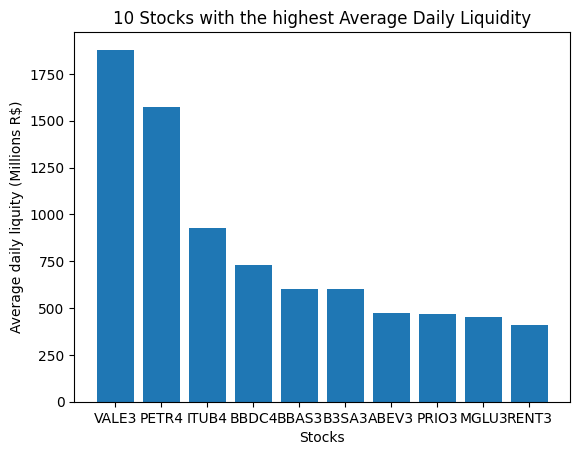

In [144]:
#title 6.1) Plot 10 stocks with the highest Average Daily Liquidity
import matplotlib.pyplot as plt

highest_averages = stocks.nlargest(10, " LIQUIDEZ MEDIA DIARIA")

# Create a column chart
plt.bar(
    highest_averages["TICKER"], 
    highest_averages[" LIQUIDEZ MEDIA DIARIA"] / 1000000
)

# Set chart title and labels
plt.title("10 Stocks with the highest Average Daily Liquidity")
plt.ylabel("Average daily liquity (Millions R$)")
plt.xlabel("Stocks")

# Plot chart
plt.plot()